In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import json
from typing import Union, List, Optional
sns.set_style("darkgrid")

#### Graphs

In [2]:
def load_from_json(path):
    with open(path, "r") as f:
        return json.load(f)


In [3]:
def se_bernoulli(mu, N=100):
    # sucess rate average over envs in percentage 
    # N trials or N envs from which we averaged
    # since percentage divide by 100
    mu = mu / 100
    sem = np.sqrt(mu * (1 - mu) / N)
    return sem

In [4]:
def calculate_stats(env_name, method="baseline", kp="default_kp", metric="mean_reward", num_runs=5):
    if kp == "default_kp":
        kp_val = 150
    elif kp == "high_kp":
        kp_val = 1000
    
    # to store values
    all_values = []  
    
    for i in range(1, num_runs + 1):
        run_name = f"{env_name}_run{i}"
        path = f"results/{kp}/{method}/{run_name}/{metric}_{kp_val}_{method}.json"
        loaded_value = load_from_json(path)
        # Case 1: Nested list (original case) [[v1, v2,...]]
        if isinstance(loaded_value, list) and len(loaded_value) == 1 and isinstance(loaded_value[0], list):
            run_values = loaded_value[0]
            all_values.extend(run_values)
        # Case 2: Single-value list [100.0] 
        elif isinstance(loaded_value, list) and len(loaded_value) == 1 and isinstance(loaded_value[0], (float, int)):
            all_values.append(loaded_value[0])
        else:
            raise ValueError(f"Unexpected structure in {run_name}: {loaded_value}")
    
    # Calculate statistics (unchanged)
    mean = np.mean(all_values)
    std = np.std(all_values, ddof=1)  # Sample standard deviation
    se = std / np.sqrt(len(all_values))  # Standard error

    return mean, std, se

##### Fetch Default KP for Baseline Diffusion and Awe + Diffusion

In [5]:
# Calculate for all environments
print("Default KP Baseline Diffusion:")
lift_baseline_default_kp_mean_reward, lift_baseline_default_kp_mean_reward_sd, lift_baseline_default_kp_mean_reward_se = calculate_stats(env_name="Lift", method="baseline", kp="default_kp")
lift_baseline_default_kp_mean_error, lift_baseline_default_kp_mean_error_sd,lift_baseline_default_kp_mean_error_se = calculate_stats(env_name="Lift", method="baseline", kp="default_kp", metric="avg_euclid_error")
lift_baseline_default_kp_mean_success, _ ,_ = calculate_stats(env_name="Lift", method="baseline", kp="default_kp", metric="success_rate")
lift_baseline_default_kp_mean_success_se = se_bernoulli(lift_baseline_default_kp_mean_success)

pickplace_baseline_default_kp_mean_reward, pickplace_baseline_default_kp_mean_reward_sd, pickplace_baseline_default_kp_mean_reward_se = calculate_stats("PickPlaceCan", method="baseline",kp="default_kp")
pickplace_baseline_default_kp_mean_error, pickplace_baseline_default_kp_mean_error_sd, pickplace_baseline_default_kp_mean_error_se = calculate_stats(env_name="PickPlaceCan", method="baseline", kp="default_kp", metric="avg_euclid_error")
pickplace_baseline_default_kp_mean_success,  _ ,_ = calculate_stats(env_name="PickPlaceCan", method="baseline", kp="default_kp", metric="success_rate")
pickplace_baseline_default_kp_mean_success_se = se_bernoulli(pickplace_baseline_default_kp_mean_success)


nutassembly_baseline_default_kp_mean_reward, nutassembly_baseline_default_kp_mean_reward_sd, nutassembly_baseline_default_kp_mean_reward_se = calculate_stats("NutAssemblySquare", method="baseline",kp="default_kp")
nutassembly_baseline_default_kp_mean_error, nutassembly_baseline_default_kp_mean_error_sd, nutassembly_baseline_default_kp_mean_error_se = calculate_stats(env_name="NutAssemblySquare", method="baseline", kp="default_kp", metric="avg_euclid_error")
nutassembly_baseline_default_kp_mean_success, _ ,_ = calculate_stats(env_name="NutAssemblySquare", method="baseline", kp="default_kp", metric="success_rate")
nutassembly_baseline_default_kp_mean_success_se = se_bernoulli(nutassembly_baseline_default_kp_mean_success)

print("Default KP Awe + Diffusion:")
lift_awe_default_kp_mean_reward, lift_awe_default_kp_mean_reward_sd, lift_awe_default_kp_mean_reward_se = calculate_stats(env_name="Lift", method="awe",kp="default_kp")
lift_awe_default_kp_mean_error, lift_awe_default_kp_mean_error_sd, lift_awe_default_kp_mean_error_se = calculate_stats(env_name="Lift", method="awe", kp="default_kp", metric="avg_euclid_error")
lift_awe_default_kp_mean_success, _ ,_ = calculate_stats(env_name="Lift", method="awe", kp="default_kp", metric="success_rate")
lift_awe_default_kp_mean_success_se = se_bernoulli(lift_awe_default_kp_mean_success)


pickplace_awe_default_kp_mean_reward, pickplace_awe_default_kp_mean_reward_sd, pickplace_awe_default_kp_mean_reward_se = calculate_stats("PickPlaceCan", method="awe",kp="default_kp")
pickplace_awe_default_kp_mean_error, pickplace_awe_default_kp_mean_error_sd, pickplace_awe_default_kp_mean_error_se = calculate_stats(env_name="PickPlaceCan", method="awe", kp="default_kp", metric="avg_euclid_error")
pickplace_awe_default_kp_mean_success, _ ,_ = calculate_stats(env_name="PickPlaceCan", method="awe", kp="default_kp", metric="success_rate")
pickplace_awe_default_kp_mean_success_se = se_bernoulli(pickplace_awe_default_kp_mean_success)


nutassembly_awe_default_kp_mean_reward, nutassembly_awe_default_kp_mean_reward_sd, nutassembly_awe_default_kp_mean_reward_se = calculate_stats("NutAssemblySquare", method="awe",kp="default_kp")
nutassembly_awe_default_kp_mean_error, nutassembly_awe_default_kp_mean_error_sd, nutassembly_awe_default_kp_mean_error_se = calculate_stats(env_name="NutAssemblySquare", method="awe", kp="default_kp", metric="avg_euclid_error")
nutassembly_awe_default_kp_mean_success, _, _  = calculate_stats(env_name="NutAssemblySquare", method="awe", kp="default_kp", metric="success_rate")
nutassembly_awe_default_kp_mean_success_se = se_bernoulli(nutassembly_awe_default_kp_mean_success)


Default KP Baseline Diffusion:
Default KP Awe + Diffusion:


##### Fetch High KP for Baseline Diffusion and Awe + Diffusion

In [6]:
# Calculate for all environments
print("High KP Baseline Diffusion:")
lift_baseline_high_kp_mean_reward, lift_baseline_high_kp_mean_reward_sd, lift_baseline_high_kp_mean_reward_se = calculate_stats(env_name="Lift", method="baseline", kp="high_kp")
lift_baseline_high_kp_mean_error, lift_baseline_high_kp_mean_error_sd, lift_baseline_high_kp_mean_error_se = calculate_stats(env_name="Lift", method="baseline", kp="high_kp", metric="avg_euclid_error")
lift_baseline_high_kp_mean_success, _, _ = calculate_stats(env_name="Lift", method="baseline", kp="high_kp", metric="success_rate")
lift_baseline_high_kp_mean_success_se = se_bernoulli(lift_baseline_high_kp_mean_success)

pickplace_baseline_high_kp_mean_reward, pickplace_baseline_high_kp_mean_reward_sd, pickplace_baseline_high_kp_mean_reward_se = calculate_stats("PickPlaceCan", method="baseline",kp="high_kp")
pickplace_baseline_high_kp_mean_error, pickplace_baseline_high_kp_mean_error_sd, pickplace_baseline_high_kp_mean_error_se = calculate_stats(env_name="PickPlaceCan", method="baseline", kp="high_kp", metric="avg_euclid_error")
pickplace_baseline_high_kp_mean_success, _, _ = calculate_stats(env_name="PickPlaceCan", method="baseline", kp="high_kp", metric="success_rate")
pickplace_baseline_high_kp_mean_success_se = se_bernoulli(pickplace_baseline_high_kp_mean_success)


nutassembly_baseline_high_kp_mean_reward, nutassembly_baseline_high_kp_mean_reward_sd, nutassembly_baseline_high_kp_mean_reward_se = calculate_stats("NutAssemblySquare", method="baseline",kp="high_kp")
nutassembly_baseline_high_kp_mean_error, nutassembly_baseline_high_kp_mean_error_sd, nutassembly_baseline_high_kp_mean_error_se = calculate_stats(env_name="NutAssemblySquare", method="baseline", kp="high_kp", metric="avg_euclid_error")
nutassembly_baseline_high_kp_mean_success, _, _ = calculate_stats(env_name="NutAssemblySquare", method="baseline", kp="high_kp", metric="success_rate")
nutassembly_baseline_high_kp_mean_success_se = se_bernoulli(nutassembly_baseline_high_kp_mean_success)

print("High KP Awe + Diffusion:")
lift_awe_high_kp_mean_reward, lift_awe_high_kp_mean_reward_sd, lift_awe_high_kp_mean_reward_se = calculate_stats(env_name="Lift", method="awe",kp="high_kp")
lift_awe_high_kp_mean_error, lift_awe_high_kp_mean_error_sd, lift_awe_high_kp_mean_error_se = calculate_stats(env_name="Lift", method="awe", kp="high_kp", metric="avg_euclid_error")
lift_awe_high_kp_mean_success, _, _ = calculate_stats(env_name="Lift", method="awe", kp="high_kp", metric="success_rate")
lift_awe_high_kp_mean_success_se = se_bernoulli(lift_awe_high_kp_mean_success)


pickplace_awe_high_kp_mean_reward, pickplace_awe_high_kp_mean_reward_sd, pickplace_awe_high_kp_mean_reward_se = calculate_stats("PickPlaceCan", method="awe",kp="high_kp")
pickplace_awe_high_kp_mean_error, pickplace_awe_high_kp_mean_error_sd, pickplace_awe_high_kp_mean_error_se = calculate_stats(env_name="PickPlaceCan", method="awe", kp="high_kp", metric="avg_euclid_error")
pickplace_awe_high_kp_mean_success, _, _ = calculate_stats(env_name="PickPlaceCan", method="awe", kp="high_kp", metric="success_rate")
pickplace_awe_high_kp_mean_success_se = se_bernoulli(pickplace_awe_high_kp_mean_success)


nutassembly_awe_high_kp_mean_reward, nutassembly_awe_high_kp_mean_reward_sd, nutassembly_awe_high_kp_mean_reward_se = calculate_stats("NutAssemblySquare", method="awe",kp="high_kp")
nutassembly_awe_high_kp_mean_error, nutassembly_awe_high_kp_mean_error_sd, nutassembly_awe_high_kp_mean_error_se = calculate_stats(env_name="NutAssemblySquare", method="awe", kp="high_kp", metric="avg_euclid_error")
nutassembly_awe_high_kp_mean_success, _, _ = calculate_stats(env_name="NutAssemblySquare", method="awe", kp="high_kp", metric="success_rate")
nutassembly_awe_high_kp_mean_success_se = se_bernoulli(nutassembly_awe_high_kp_mean_success)


High KP Baseline Diffusion:
High KP Awe + Diffusion:


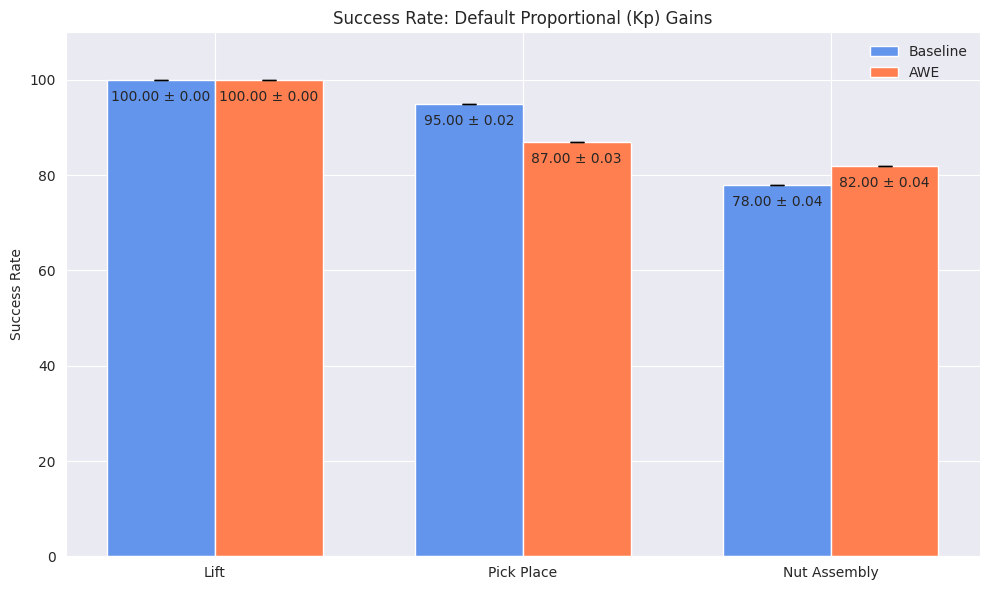

In [ ]:
# Data
labels = ["Lift", "Pick Place", "Nut Assembly"]
baseline_success = [
    lift_baseline_default_kp_mean_success,       # Lift (kp150)
    pickplace_baseline_default_kp_mean_success,  # Pick Place (kp150)
    nutassembly_baseline_default_kp_mean_success # Nut Assembly (kp150)
]
awe_success = [
    lift_awe_default_kp_mean_success,            # Lift (kp150)
    pickplace_awe_default_kp_mean_success,       # Pick Place (kp150)
    nutassembly_awe_default_kp_mean_success      # Nut Assembly (kp150)
]

# Standard errors
baseline_se = [
    lift_baseline_default_kp_mean_success_se,
    pickplace_baseline_default_kp_mean_success_se,
    nutassembly_baseline_default_kp_mean_success_se
]
awe_se = [
    lift_awe_default_kp_mean_success_se,
    pickplace_awe_default_kp_mean_success_se,
    nutassembly_awe_default_kp_mean_success_se
]

# Bar positions
x = np.arange(len(labels))
width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars with error bars
rects1 = ax.bar(x - width/2, baseline_success, width, label="Baseline", 
               color="cornflowerblue", yerr=baseline_se, capsize=5)
rects2 = ax.bar(x + width/2, awe_success, width, label="AWE", 
               color="coral", yerr=awe_se, capsize=5)

# Formatting
ax.set_ylabel("Success Rate")
ax.set_title("Success Rate: Default Proportional (Kp) Gains")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(frameon=False)

# Set y-axis limits to show error bars
ax.set_ylim(0, 1.1 * max(max(baseline_success), max(awe_success)))

# Add value labels on bars
def autolabel(rects, errors=None, y_offset=-5.0):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        y_pos = height + y_offset
        
        if errors is not None:
            ax.annotate(f"{height:.2f} ± {errors[i]:.2f}",
                        xy=(rect.get_x() + rect.get_width()/2, y_pos),
                        ha="center", va="bottom")
        else:
            ax.annotate(f"{height:.2f}",
                        xy=(rect.get_x() + rect.get_width()/2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha="center", va="bottom")

autolabel(rects1, baseline_se)
autolabel(rects2, awe_se)

plt.tight_layout()
plt.show()

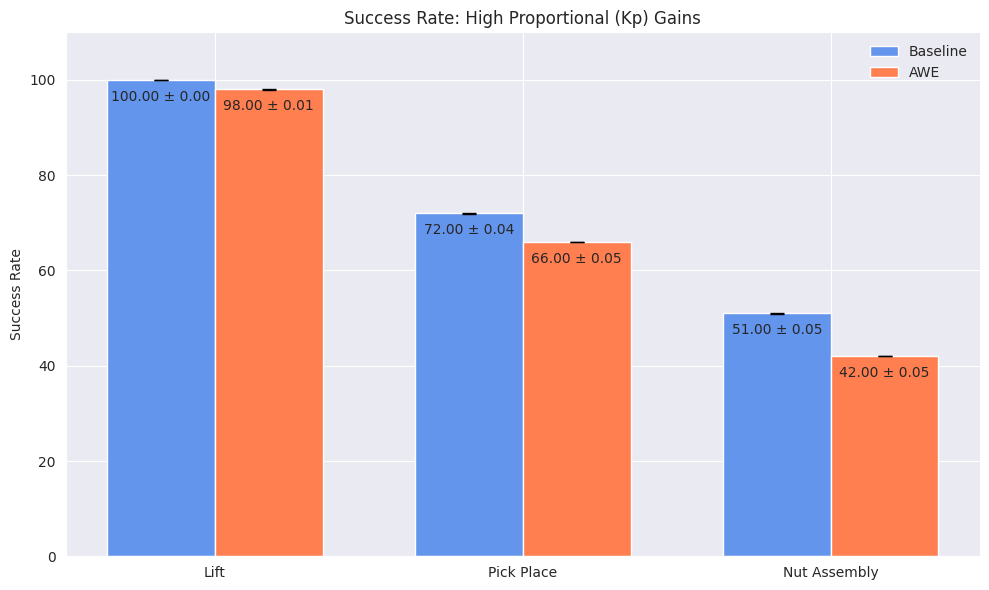

In [ ]:
# Data
labels = ["Lift", "Pick Place", "Nut Assembly"]
baseline_success = [
    lift_baseline_high_kp_mean_success,       # Lift (1K)
    pickplace_baseline_high_kp_mean_success,  # Pick Place (1K)
    nutassembly_baseline_high_kp_mean_success # Nut Assembly (1K)
]
awe_success = [
    lift_awe_high_kp_mean_success,            # Lift (1K)
    pickplace_awe_high_kp_mean_success,       # Pick Place (1K)
    nutassembly_awe_high_kp_mean_success      # Nut Assembly (1K)
]


# Standard errors
baseline_se = [
    lift_baseline_high_kp_mean_success_se,
    pickplace_baseline_high_kp_mean_success_se,
    nutassembly_baseline_high_kp_mean_success_se
]
awe_se = [
    lift_awe_high_kp_mean_success_se,
    pickplace_awe_high_kp_mean_success_se,
    nutassembly_awe_high_kp_mean_success_se
]

# Bar positions
x = np.arange(len(labels))
width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars with error bars
rects1 = ax.bar(x - width/2, baseline_success, width, label="Baseline", 
               color="cornflowerblue", yerr=baseline_se, capsize=5)
rects2 = ax.bar(x + width/2, awe_success, width, label="AWE", 
               color="coral", yerr=awe_se, capsize=5)

# Formatting
ax.set_ylabel("Success Rate")
ax.set_title("Success Rate: High Proportional (Kp) Gains")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(frameon=False)

# Set y-axis limits to show error bars
ax.set_ylim(0, 1.1 * max(max(baseline_success), max(awe_success)))

# Add value labels on bars
def autolabel(rects, errors=None, y_offset=-5.0):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        y_pos = height + y_offset
        
        if errors is not None:
            ax.annotate(f"{height:.2f} ± {errors[i]:.2f}",
                        xy=(rect.get_x() + rect.get_width()/2, y_pos),
                        ha="center", va="bottom")
        else:
            ax.annotate(f"{height:.2f}",
                        xy=(rect.get_x() + rect.get_width()/2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha="center", va="bottom")

autolabel(rects1, baseline_se)
autolabel(rects2, awe_se)

plt.tight_layout()
plt.show()

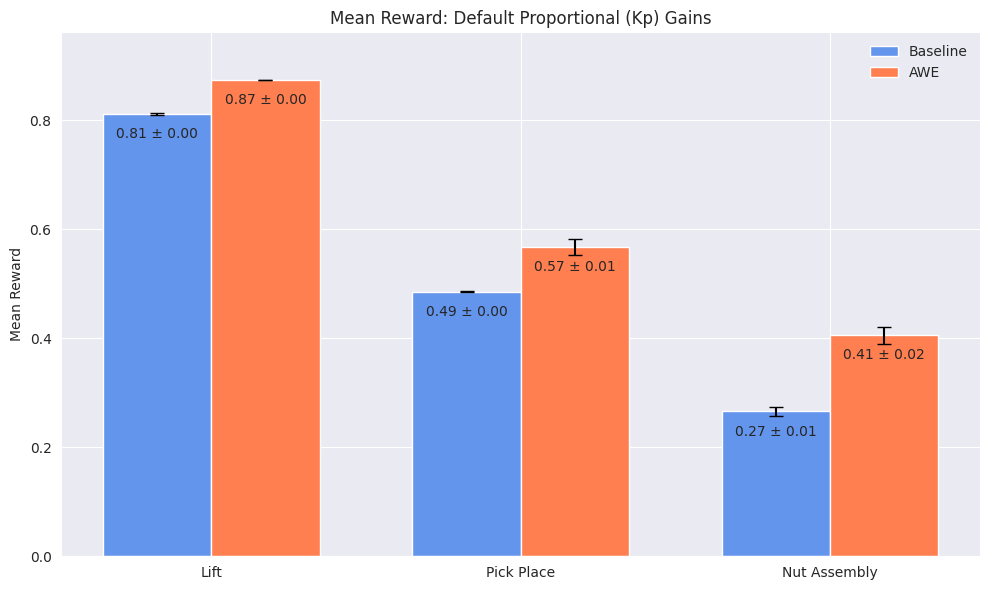

In [ ]:
# Data
labels = ["Lift", "Pick Place", "Nut Assembly"]
baseline_reward = [
    lift_baseline_default_kp_mean_reward,       # Lift (kp150)
    pickplace_baseline_default_kp_mean_reward,  # Pick Place (kp150)
    nutassembly_baseline_default_kp_mean_reward # Nut Assembly (kp150)
]
awe_reward = [
    lift_awe_default_kp_mean_reward,            # Lift (kp150)
    pickplace_awe_default_kp_mean_reward,       # Pick Place (kp150)
    nutassembly_awe_default_kp_mean_reward      # Nut Assembly (kp150)
]

# Standard errors
baseline_se = [
    lift_baseline_default_kp_mean_reward_se,
    pickplace_baseline_default_kp_mean_reward_se,
    nutassembly_baseline_default_kp_mean_reward_se
]
awe_se = [
    lift_awe_default_kp_mean_reward_se,
    pickplace_awe_default_kp_mean_reward_se,
    nutassembly_awe_default_kp_mean_reward_se
]

# Bar positions
x = np.arange(len(labels))
width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars with error bars
rects1 = ax.bar(x - width/2, baseline_reward, width, label="Baseline", 
               color="cornflowerblue", yerr=baseline_se, capsize=5)
rects2 = ax.bar(x + width/2, awe_reward, width, label="AWE", 
               color="coral", yerr=awe_se, capsize=5)

# Formatting
ax.set_ylabel("Mean Reward")
ax.set_title("Mean Reward: Default Proportional (Kp) Gains")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(frameon=False)

# Set y-axis limits to show error bars
ax.set_ylim(0, 1.1 * max(max(baseline_reward), max(awe_reward)))

# Add value labels on bars
def autolabel(rects, errors=None, y_offset=-0.05):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        y_pos = height + y_offset
        
        if errors is not None:
            ax.annotate(f"{height:.2f} ± {errors[i]:.2f}",
                        xy=(rect.get_x() + rect.get_width()/2, y_pos),
                        ha="center", va="bottom")
        else:
            ax.annotate(f"{height:.2f}",
                        xy=(rect.get_x() + rect.get_width()/2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha="center", va="bottom")

autolabel(rects1, baseline_se)
autolabel(rects2, awe_se)

plt.tight_layout()
plt.show()

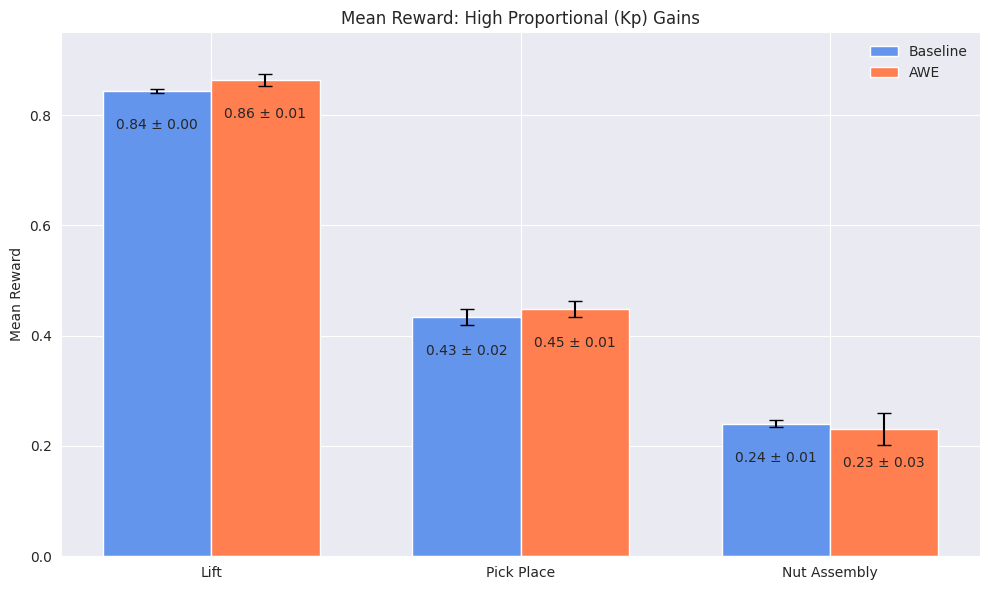

In [ ]:
# Data
labels = ["Lift", "Pick Place", "Nut Assembly"]
baseline_reward = [
    lift_baseline_high_kp_mean_reward,       # Lift (kp1K)
    pickplace_baseline_high_kp_mean_reward,  # Pick Place (kp1K)
    nutassembly_baseline_high_kp_mean_reward # Nut Assembly (kp1K)
]
awe_reward = [
    lift_awe_high_kp_mean_reward,            # Lift (kp1K)
    pickplace_awe_high_kp_mean_reward,       # Pick Place (kp1K)
    nutassembly_awe_high_kp_mean_reward      # Nut Assembly (kp1K)
]

# Standard errors
baseline_se = [
    lift_baseline_high_kp_mean_reward_se,
    pickplace_baseline_high_kp_mean_reward_se,
    nutassembly_baseline_high_kp_mean_reward_se
]
awe_se = [
    lift_awe_high_kp_mean_reward_se,
    pickplace_awe_high_kp_mean_reward_se,
    nutassembly_awe_high_kp_mean_reward_se
]

# Bar positions
x = np.arange(len(labels))
width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars with error bars
rects1 = ax.bar(x - width/2, baseline_reward, width, label="Baseline", 
               color="cornflowerblue", yerr=baseline_se, capsize=5)
rects2 = ax.bar(x + width/2, awe_reward, width, label="AWE", 
               color="coral", yerr=awe_se, capsize=5)

# Formatting
ax.set_ylabel("Mean Reward")
ax.set_title("Mean Reward: High Proportional (Kp) Gains")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(frameon=False)

# Set y-axis limits to show error bars
ax.set_ylim(0, 1.1 * max(max(baseline_reward), max(awe_reward)))

# Add value labels on bars
def autolabel(rects, errors=None, y_offset=-0.075):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        y_pos = height + y_offset
        
        if errors is not None:
            ax.annotate(f"{height:.2f} ± {errors[i]:.2f}",
                        xy=(rect.get_x() + rect.get_width()/2, y_pos),
                        ha="center", va="bottom")
        else:
            ax.annotate(f"{height:.2f}",
                        xy=(rect.get_x() + rect.get_width()/2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha="center", va="bottom")

autolabel(rects1, baseline_se)
autolabel(rects2, awe_se)

plt.tight_layout()
plt.show()

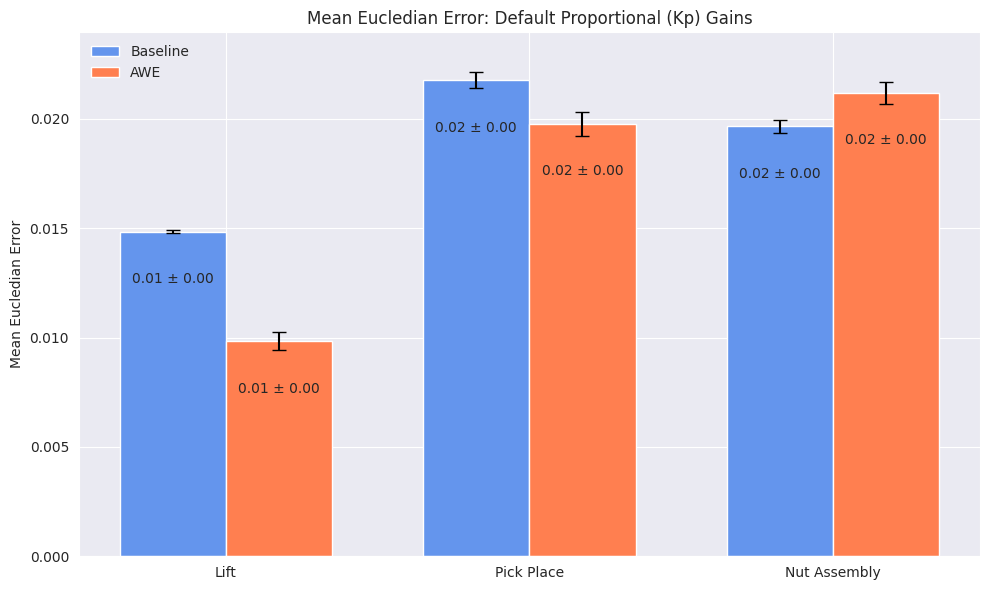

In [ ]:
# Data
labels = ["Lift", "Pick Place", "Nut Assembly"]
baseline_error = [
    lift_baseline_default_kp_mean_error,       # Lift (kp150)
    pickplace_baseline_default_kp_mean_error,  # Pick Place (kp150)
    nutassembly_baseline_default_kp_mean_error # Nut Assembly (kp150)
]
awe_error = [
    lift_awe_default_kp_mean_error,            # Lift (kp150)
    pickplace_awe_default_kp_mean_error,       # Pick Place (kp150)
    nutassembly_awe_default_kp_mean_error      # Nut Assembly (kp150)
]

# Standard errors
baseline_se = [
    lift_baseline_default_kp_mean_error_se,
    pickplace_baseline_default_kp_mean_error_se,
    nutassembly_baseline_default_kp_mean_error_se
]
awe_se = [
    lift_awe_default_kp_mean_error_se,
    pickplace_awe_default_kp_mean_error_se,
    nutassembly_awe_default_kp_mean_error_se
]

# Bar positions
x = np.arange(len(labels))
width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars with error bars
rects1 = ax.bar(x - width/2, baseline_error, width, label="Baseline", 
               color="cornflowerblue", yerr=baseline_se, capsize=5)
rects2 = ax.bar(x + width/2, awe_error, width, label="AWE", 
               color="coral", yerr=awe_se, capsize=5)

# Formatting
ax.set_ylabel("Mean Eucledian Error")
ax.set_title("Mean Eucledian Error: Default Proportional (Kp) Gains")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(frameon=False)

# Set y-axis limits to show error bars
ax.set_ylim(0, 1.1 * max(max(baseline_error), max(awe_error)))

# Add value labels on bars
def autolabel(rects, errors=None, y_offset=-0.0025):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        y_pos = height + y_offset
        
        if errors is not None:
            ax.annotate(f"{height:.2f} ± {errors[i]:.2f}",
                        xy=(rect.get_x() + rect.get_width()/2, y_pos),
                        ha="center", va="bottom")
        else:
            ax.annotate(f"{height:.2f}",
                        xy=(rect.get_x() + rect.get_width()/2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha="center", va="bottom")
autolabel(rects1, baseline_se)
autolabel(rects2, awe_se)

plt.tight_layout()
plt.show()

In [13]:
baseline_se

[7.872842809775716e-05, 0.0003795022442824648, 0.0002981255618249918]

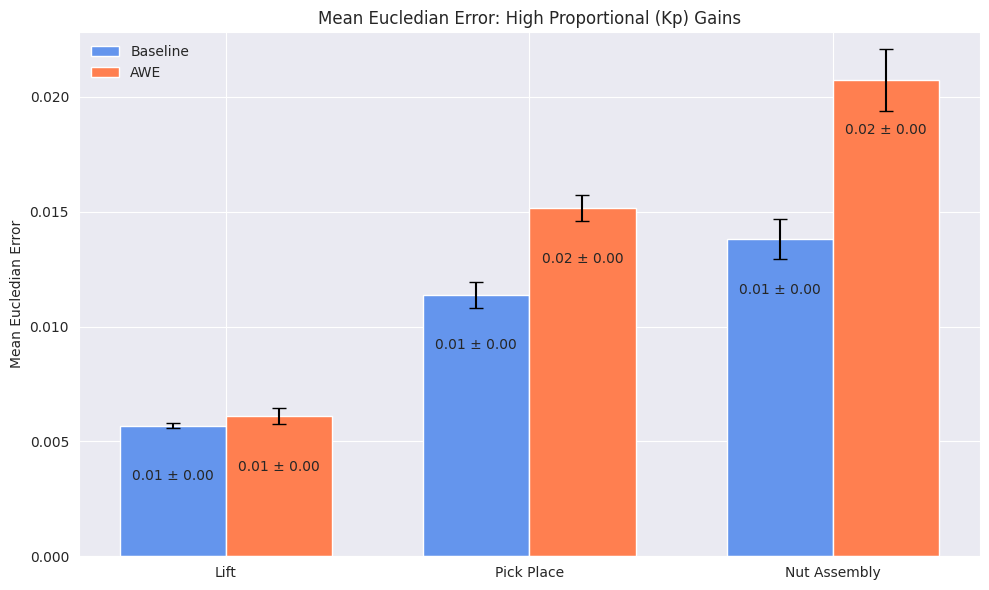

In [ ]:
# Data
labels = ["Lift", "Pick Place", "Nut Assembly"]
baseline_error = [
    lift_baseline_high_kp_mean_error,       # Lift (kp1K)
    pickplace_baseline_high_kp_mean_error,  # Pick Place (kp1K)
    nutassembly_baseline_high_kp_mean_error # Nut Assembly (kp1K)
]
awe_error = [
    lift_awe_high_kp_mean_error,            # Lift (kp1K)
    pickplace_awe_high_kp_mean_error,       # Pick Place (kp1K)
    nutassembly_awe_high_kp_mean_error      # Nut Assembly (kp1K)
]

# Standard errors
baseline_se = [
    lift_baseline_high_kp_mean_error_se,
    pickplace_baseline_high_kp_mean_error_se,
    nutassembly_baseline_high_kp_mean_error_se
]
awe_se = [
    lift_awe_high_kp_mean_error_se,
    pickplace_awe_high_kp_mean_error_se,
    nutassembly_awe_high_kp_mean_error_se
]

# Bar positions
x = np.arange(len(labels))
width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars with error bars
rects1 = ax.bar(x - width/2, baseline_error, width, label="Baseline", 
               color="cornflowerblue", yerr=baseline_se, capsize=5)
rects2 = ax.bar(x + width/2, awe_error, width, label="AWE", 
               color="coral", yerr=awe_se, capsize=5)

# Formatting
ax.set_ylabel("Mean Eucledian Error")
ax.set_title("Mean Eucledian Error: High Proportional (Kp) Gains")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(frameon=False)

# Set y-axis limits to show error bars
ax.set_ylim(0, 1.1 * max(max(baseline_error), max(awe_error)))

# Add value labels on bars
def autolabel(rects, errors=None, y_offset=-0.0025):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        y_pos = height + y_offset
        
        if errors is not None:
            ax.annotate(f"{height:.2f} ± {errors[i]:.2f}",
                        xy=(rect.get_x() + rect.get_width()/2, y_pos),
                        ha="center", va="bottom")
        else:
            ax.annotate(f"{height:.2f}",
                        xy=(rect.get_x() + rect.get_width()/2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha="center", va="bottom")

autolabel(rects1, baseline_se)
autolabel(rects2, awe_se)

plt.tight_layout()
plt.show()